In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("D:\\archive\\insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [2]:
import os

# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 136 images in 'D:\archive\insat3d_ir_cyclone_ds\CYCLONE_DATASET_INFRARED'.


In [3]:
#os.mkdir("C:\\Users\\vedan\\OneDrive\\Documents\\Mywork\\python\\output_dir")

In [ ]:
# import os
# import shutil
 
# source = "D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED"
# destination = "C:\\Users\\vedan\\OneDrive\\Documents\\Mywork\\python\\output_dir"
 
# # gather all files
# allfiles = os.listdir(source)
 
# # iterate on all files to move them to destination folder
# for f in allfiles[133:]:
    
#     src_path = os.path.join(source, f)
#     dst_path = os.path.join(destination, f)
#     shutil.move(src_path, dst_path)

In [3]:
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on 

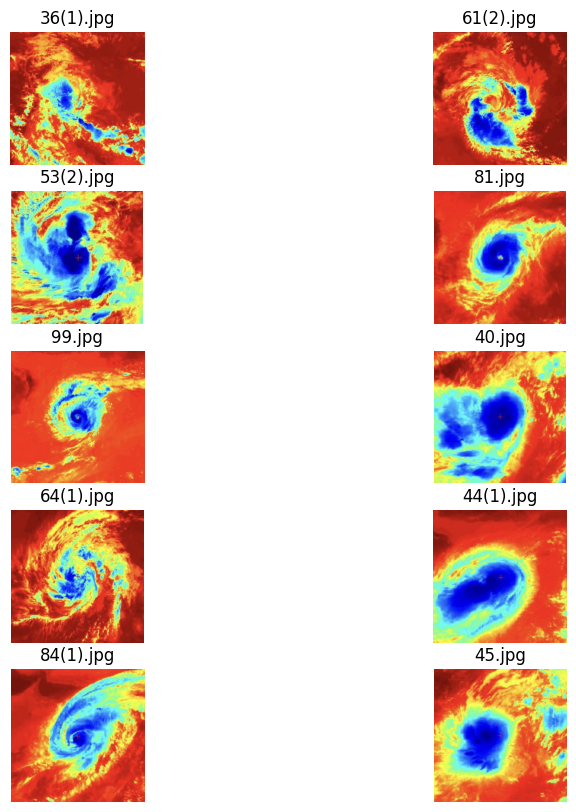

In [4]:
view_random_image("D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED")

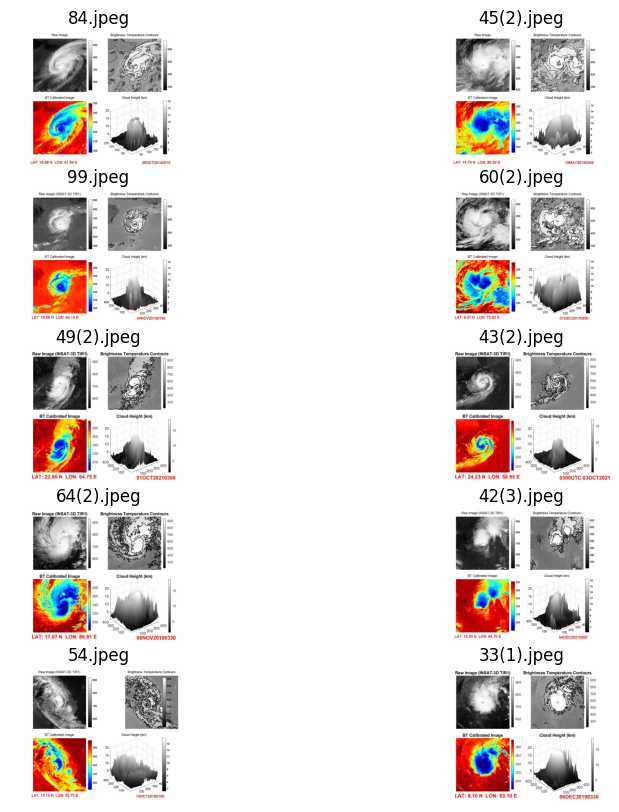

In [5]:
view_random_image("D:\\archive\\insat3d_for_reference_ds\\CYCLONE_DATASET")

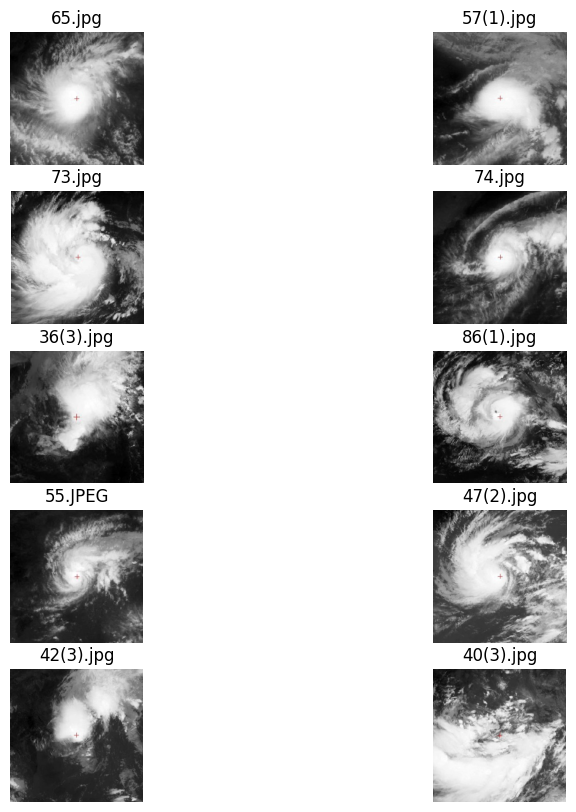

In [6]:
view_random_image("D:\\archive\\insat3d_raw_cyclone_ds\\CYCLONE_DATASET_FINAL")

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("D:\\archive\\insat_3d_ds - Sheet.csv")

In [8]:
train_dir="D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )

Found 136 validated image filenames.


In [50]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

# y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
# y=tf.keras.layers.BatchNormalization()(y)
# y=tf.keras.activations.relu(y)
# y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(6,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [51]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 tf.nn.relu_6 (TFOpLambda)   (None, 256, 256, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 6)       1734      
                                                                 
 batch_normalization_7 (Batc  (None, 256, 256, 6)      24        
 hNormalization)                                           

In [57]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=['mse'])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [58]:
history_1=model_1.fit(train_data,
                      epochs=10,callbacks=[early_stopping])

Epoch 1/10
9/9 [==============================] - 6s 568ms/step - loss: 2030.3291 - mse: 2027.1388
Epoch 2/10
9/9 [==============================] - 4s 439ms/step - loss: 949.8630 - mse: 946.6693
Epoch 3/10
9/9 [==============================] - 4s 476ms/step - loss: 355.0977 - mse: 351.8996
Epoch 4/10
9/9 [==============================] - 4s 463ms/step - loss: 203.1128 - mse: 199.9115
Epoch 5/10
9/9 [==============================] - 4s 468ms/step - loss: 121.8065 - mse: 118.6027
Epoch 6/10
9/9 [==============================] - 4s 451ms/step - loss: 110.2073 - mse: 107.0009
Epoch 7/10
9/9 [==============================] - 4s 444ms/step - loss: 78.3314 - mse: 75.1230
Epoch 8/10
9/9 [==============================] - 5s 582ms/step - loss: 54.0738 - mse: 50.8642
Epoch 9/10
9/9 [==============================] - 5s 530ms/step - loss: 63.9690 - mse: 60.7590
Epoch 10/10
9/9 [==============================] - 5s 520ms/step - loss: 54.7287 - mse: 51.5182


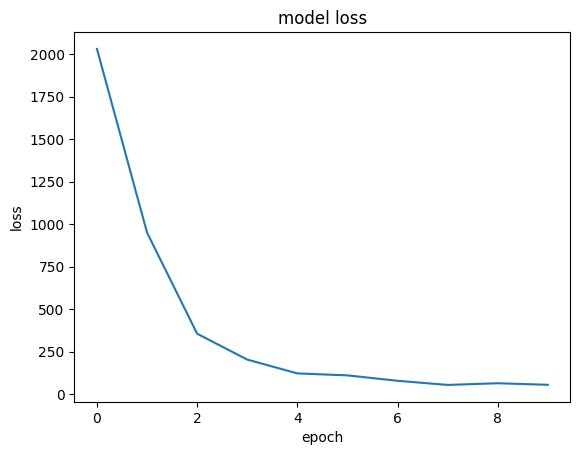

In [59]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [60]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [61]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 0s 122ms/step


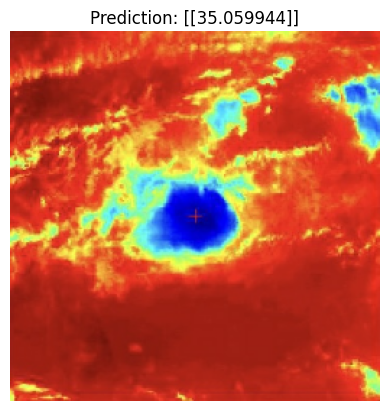

In [62]:
pred_and_plot(model_1,"D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED\\37.jpg")

1/1 [==============================] - 0s 49ms/step


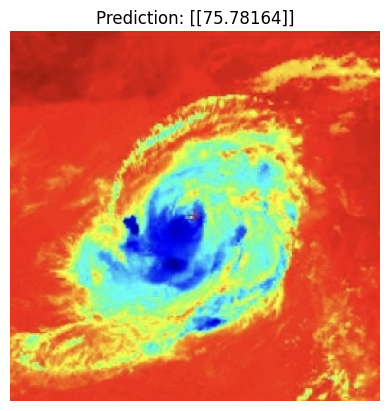

In [63]:
pred_and_plot(model_1,"D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED\\94.jpg")

1/1 [==============================] - 0s 58ms/step


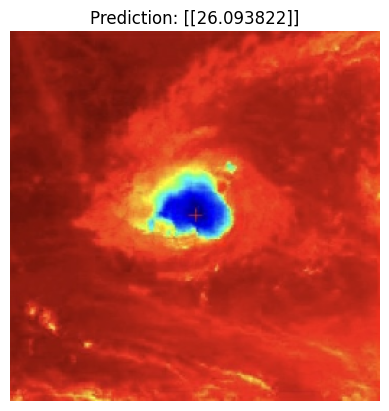

In [64]:
pred_and_plot(model_1,"D:\\archive\\insat3d_ir_cyclone_ds\\CYCLONE_DATASET_INFRARED\\25.jpg")